# Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad
Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

## Objetivos
Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de Machine Learning.
Generar una API que brinde predicciones como resultado a partir de datos enviados.

## Proyecto
Selecciona uno de los siguientes datasets:
Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

Reviews de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps

Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners

Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un dataset, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

Entrena el modelo de Machine Learning, procesamiento de lenguaje natural o red neuronal que creas adecuado.

Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (ensemblings) y de ajuste de hiperparámetros o tuning para intentar mejorar la precisión y disminuir la varianza de tu modelo.
Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto.

Criterios de evaluación
Actividad	Porcentaje	Observaciones	Punto parcial
Actividad 1. Limpieza y EDA	20	Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica).	Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora.
Actividad 2. Entrenamiento del modelo	20	Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba.	No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %.
Actividad 3. Graficación y métricas	20	Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de tuning y ensambles adecuados para tu problema.	Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el tuning de hiperparámetros.
Actividad 4. API REST	20	Generaste con éxito un link público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma.	N/A
Actividad 5. Presentación	20	Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos.	La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.
Mucho éxito en tu camino como Data Scientist.

In [1]:
!pip install tensorflow

In [2]:
!pip install pydot

In [3]:
#Importar las librerías necesarias
import numpy as np
import tensorflow as tfa
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

#estilo de Seaborn como "darkgrid" para los gráficos y permite el uso de códigos de color.
sns.set(style= "darkgrid", color_codes = True)

#Importa varios componentes de TensorFlow y Keras que se utilizan en el código posterior.
#Esto incluye una arquitectura de red neuronal preentrenada (VGG16), modelos secuenciales, capas como Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input, regularizadores L2 y métricas como Precisión, Recall y BinaryAccuracy.
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

#Importa algunas funciones de scikit-learn que se utilizan para calcular curvas ROC y áreas bajo la curva ROC (AUC).
from sklearn.metrics import roc_curve, auc

#Importación de componentes de TensorFlow para procesamiento de imágenes
from tensorflow.keras.preprocessing.image import  load_img
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Definir tamaño de imagen y otros parámetros

img_width, img_height = 256, 256
batchsize = 32
epochs = 10
num_of_class = 2

train = keras. utils.image_dataset_from_directory(
    directory='/Users/Mariana_1/ORGANIZADOS/APRENDIENDO SISTEMAS/DATA SCIENCE/UCAMP DATA SCIENCE & AI/M7/Proyecto 7/chest_xray/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

validation = keras. utils.image_dataset_from_directory(
    directory='/Users/Mariana_1/ORGANIZADOS/APRENDIENDO SISTEMAS/DATA SCIENCE/UCAMP DATA SCIENCE & AI/M7/Proyecto 7/chest_xray/val',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

test = keras. utils.image_dataset_from_directory(
    directory='/Users/Mariana_1/ORGANIZADOS/APRENDIENDO SISTEMAS/DATA SCIENCE/UCAMP DATA SCIENCE & AI/M7/Proyecto 7/chest_xray/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


## Vizualización de los datos

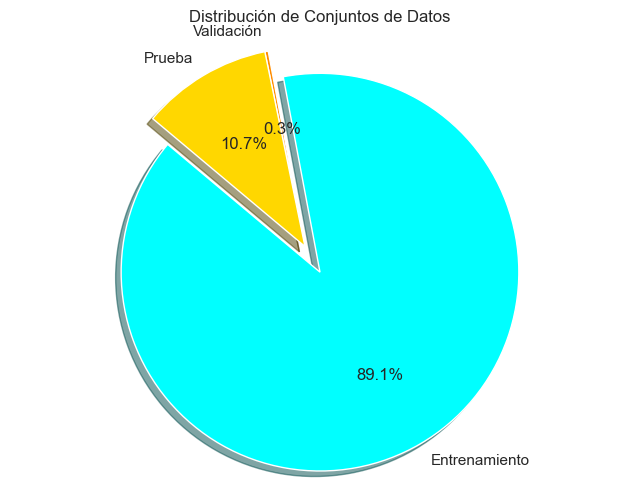

In [5]:
# Número de imágenes en cada conjunto
num_images_entrenamiento = 5216
num_images_validacion = 16
num_images_prueba = 624

# Etiquetas para los conjuntos
conjuntos = ['Entrenamiento', 'Validación', 'Prueba']

# Cantidad de imágenes en cada conjunto
cantidad_imagenes = [num_images_entrenamiento, num_images_validacion, num_images_prueba]

# Colores para las partes del pastel
colores = ['cyan','darkorange','gold']

# Explode para resaltar una parte del pastel (opcional)
explode = (0.15, 0, 0)  # Resalta la primera porción (Entrenamiento)

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(cantidad_imagenes, labels=conjuntos, colors=colores, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribución de Conjuntos de Datos')
plt.axis('equal')  # Proporción igual para asegurarse de que sea un círculo
plt.show()

In [6]:
print(train.class_names)
print(validation.class_names)
print(test.class_names)

['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


In [7]:
carpeta_madre = "/Users/Mariana_1/ORGANIZADOS/APRENDIENDO SISTEMAS/DATA SCIENCE/UCAMP DATA SCIENCE & AI/M7/Proyecto 7/chest_xray"

In [8]:
import os
# Asignación de carpetas de train, validación y test
train_dir = os.path.join(carpeta_madre, "train")
validation_dir = os.path.join(carpeta_madre, "val")
test_dir = os.path.join(carpeta_madre, "test")

In [9]:
# Conteo de imàgenes
num_normales_train = len(os.listdir(os.path.join(train_dir, "NORMAL")))
num_neumonia_train = len(os.listdir(os.path.join(train_dir, "PNEUMONIA")))

num_normales_val = len(os.listdir(os.path.join(validation_dir, "NORMAL")))
num_neumonia_val = len(os.listdir(os.path.join(validation_dir, "PNEUMONIA")))

num_normales_test = len(os.listdir(os.path.join(test_dir, "NORMAL")))
num_neumonia_test = len(os.listdir(os.path.join(test_dir, "PNEUMONIA")))

# Calcular el total de imágenes en cada conjunto
total_train = num_normales_train + num_neumonia_train
total_val = num_normales_val + num_neumonia_val
total_test = num_normales_test + num_neumonia_test

# Imprimir los totales
print("Total de imágenes de entrenamiento - Normales:", num_normales_train)
print("Total de imágenes de entrenamiento - Neumonía:", num_neumonia_train)

print("Total de imágenes de validación - Normales:", num_normales_val)
print("Total de imágenes de validación - Neumonía:", num_neumonia_val)

print("Total de imágenes de prueba - Normales:", num_normales_test)
print("Total de imágenes de prueba - Neumonía:", num_neumonia_test)

# Calcular el total general
total_general = total_train + total_val + total_test

# Imprimir el total general
print("Total de imágenes en todas las carpetas:", total_general)


Total de imágenes de entrenamiento - Normales: 1341
Total de imágenes de entrenamiento - Neumonía: 3875
Total de imágenes de validación - Normales: 8
Total de imágenes de validación - Neumonía: 8
Total de imágenes de prueba - Normales: 234
Total de imágenes de prueba - Neumonía: 390
Total de imágenes en todas las carpetas: 5856


In [10]:
INormales = num_normales_train + num_normales_val + num_normales_test
print('El valor total de imágenes normales es: ', INormales)

El valor total de imágenes normales es:  1583


In [11]:
INeumonia = num_neumonia_train + num_neumonia_val + num_neumonia_test
print('El valor total de imágenes con neumonía es: ', INeumonia)

El valor total de imágenes con neumonía es:  4273


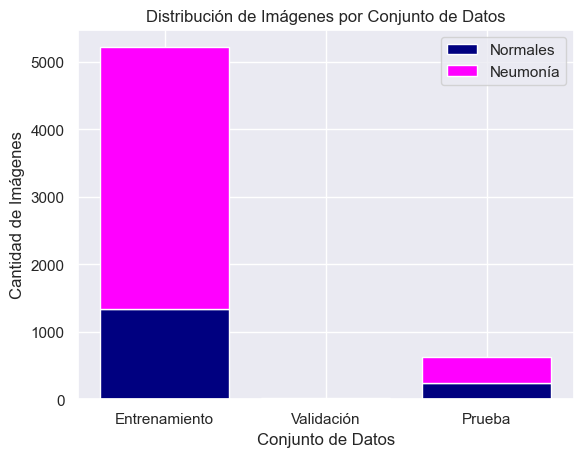

In [12]:
# Datos
categorias = ['Entrenamiento', 'Validación', 'Prueba']
normales = [num_normales_train, num_normales_val, num_normales_test]
neumonia = [num_neumonia_train, num_neumonia_val, num_neumonia_test]

# Colores para las barras
colores = ['navy', 'magenta']

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear las barras para la categoría "Normales"
ax.bar(categorias, normales, label='Normales', color=colores[0])

# Crear las barras para la categoría "Neumonía" encima de las barras "Normales"
ax.bar(categorias, neumonia, label='Neumonía', bottom=normales, color=colores[1])

# Configurar leyendas y etiquetas
ax.set_xlabel('Conjunto de Datos')
ax.set_ylabel('Cantidad de Imágenes')
ax.set_title('Distribución de Imágenes por Conjunto de Datos')
ax.legend()

# Mostrar la gráfica
plt.show()

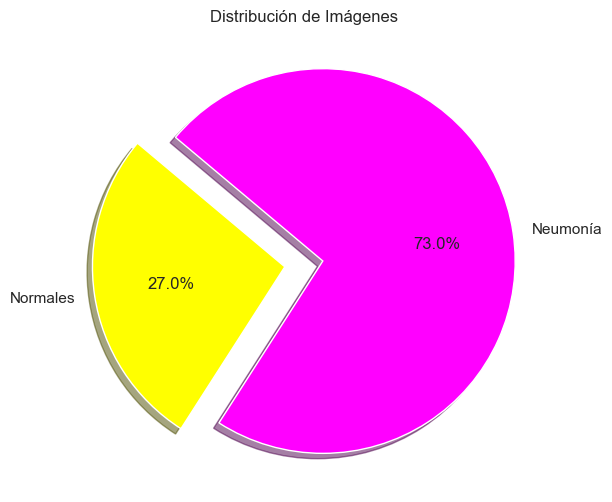

In [13]:
import matplotlib.pyplot as plt

labels = ['Normales', 'Neumonía']
sizes = [total_general - num_neumonia_train - num_neumonia_val - num_neumonia_test, num_neumonia_train + num_neumonia_val + num_neumonia_test]
colors = ['yellow', 'magenta']
explode = (0.2, 0)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribución de Imágenes')
plt.axis('equal')

plt.show()

In [14]:
#data_iterator = train.as_numpy_iterator()
#batch = data_iterator.next()
#fig, ax = plt.subplots(ncols=4, figsize=(20,20))
#for idx, img in enumerate(batch[0][:4]):
    #ax[idx].imshow(img.astype(int))
    #ax[idx].title.set_text(batch[1][idx])

In [15]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [16]:
carpeta_madre = "/Users/Mariana_1/ORGANIZADOS/APRENDIENDO SISTEMAS/DATA SCIENCE/UCAMP DATA SCIENCE & AI/M7/Proyecto 7/chest_xray"

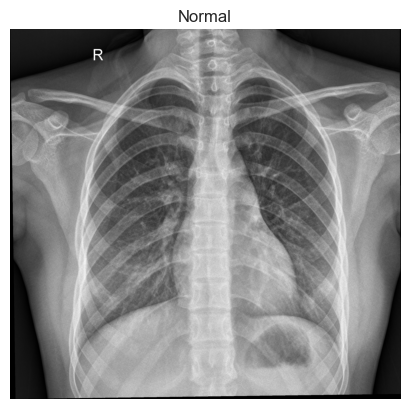

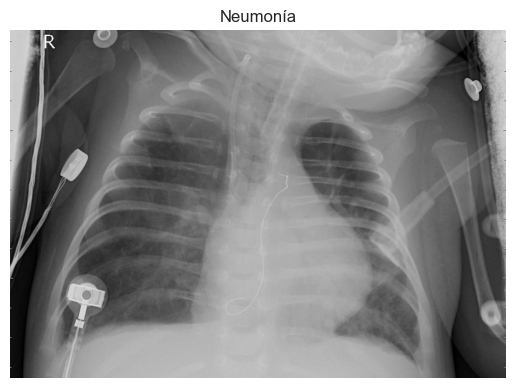

In [17]:
#MOSTRAR IMAGENES NORMAL Y NEUMONÍA
# Rutas de las carpetas de ejemplo
ejemplo_normal_dir = ('/Users/Mariana_1/ORGANIZADOS/APRENDIENDO SISTEMAS/DATA SCIENCE/UCAMP DATA SCIENCE & AI/M7/Proyecto 7/chest_xray/train/NORMAL')
ejemplo_pneumonia_dir = ('/Users/Mariana_1/ORGANIZADOS/APRENDIENDO SISTEMAS/DATA SCIENCE/UCAMP DATA SCIENCE & AI/M7/Proyecto 7/chest_xray/train/PNEUMONIA')

# Función para mostrar una imagen de ejemplo
def mostrar_imagen_ejemplo(carpeta, etiqueta):
    imagen = os.listdir(carpeta)[0]
    imagen_ruta = os.path.join(carpeta, imagen)

    plt.imshow(load_img(imagen_ruta))
    plt.title(etiqueta)
    plt.axis('off')
    plt.show()

mostrar_imagen_ejemplo(ejemplo_normal_dir, etiqueta="Normal")
mostrar_imagen_ejemplo(ejemplo_pneumonia_dir, etiqueta="Neumonía")

## Preprocesamiento de Datos

In [18]:
# Extraer características y etiquetas de los conjuntos de entrenamiento, validación y prueba

#Se crean listas vacías para cada conjunto
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []


#Se realiza un bucle for sobre los elementos del conjunto de entrenamiento (train). Para cada par (feature, label) 
#en el conjunto de entrenamiento, se toma la característica (feature) y la etiqueta (label) y se convierten a 
#matricesNumPy utilizando .numpy()
for feature, label in train:
    x_train.append(feature.numpy())
    y_train.append(label.numpy())

#Se realiza un bucle similar para los conjuntos de prueba (test) 
for feature, label in test:
    x_test.append(feature.numpy())
    y_test.append(label.numpy())

#Se realiza un bucle similar para los conjuntos de validación (validation) 
for feature, label in validation:
    x_val.append(feature.numpy())
    y_val.append(label.numpy())

#Concatenar todas las listas y obtener matrices NumPy unificadas.
x_train = np.concatenate(x_train, axis=0)
x_val = np.concatenate(x_val, axis=0)
x_test = np.concatenate(x_test, axis=0)
y_train = np.concatenate(y_train, axis=0)
y_val = np.concatenate(y_val, axis=0)
y_test = np.concatenate(y_test, axis=0)

In [19]:
#Imprimir las formas (shapes) de las matrices NumPy x_train, y_train, x_val, y_val, x_test, y y_test
print("Shape of 'x_train':", x_train.shape)
print("Shape of 'y_train':", y_train.shape)
print("Shape of 'x_val':", x_val.shape)
print("Shape of 'y_val':", y_val.shape)
print("Shape of 'x_test':", x_test.shape)
print("Shape of 'y_test':", y_test.shape)

Shape of 'x_train': (5216, 256, 256, 3)
Shape of 'y_train': (5216, 2)
Shape of 'x_val': (16, 256, 256, 3)
Shape of 'y_val': (16, 2)
Shape of 'x_test': (624, 256, 256, 3)
Shape of 'y_test': (624, 2)


In [20]:
#escalar los valores de píxeles en conjuntos de datos de imágenes, normalizando los valores de píxeles en un rango
#de 0 a 1. 
x_train=x_train/256
x_val=x_val/256
x_test=x_test/256

## Entrenar el modelo

### Para entrenar el modelo lo más conveniente es utilizar el VGG16, la cual es una arquitectura de red neuronal convolucional (CNN) profunda que fue desarrollada por el Visual Geometry Group (VGG) en la Universidad de Oxford. La red VGG16 es una variante de la arquitectura VGG que tiene 16 capas convolucionales y se destacó por su simplicidad y profundidad en ese momento.

In [21]:
#Modelo de CNN (red neuronal convolucional) que utiliza la arquitectura VGG16 
def CNN_Model():
    base_model = VGG16(weights='imagenet', include_top = False, input_shape=(img_width, img_height, 3))
    # Freeze the base model
    for layer in base_model.layers:
        layer.trainable = False

    for i in range(3):
        base_model.layers[-2-i].trainable = True

    CNN = Sequential()
    CNN.add(Input(shape=(img_width, img_height,3)))
    CNN.add(base_model)
    CNN.add(Flatten())
    CNN.add(Dropout(0.3))
    CNN.add(Dense(128, activation='relu', kernel_regularizer=l2(0.05)))
    CNN.add(Dropout(0.2))
    CNN.add(Dense(2, activation='sigmoid'))
    
    return CNN

# Entrenamiento de CNN
model = CNN_Model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()  
# Visualización de capas del modelo CNN
keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4194432   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 18909378 (72.13 MB)
Trainable params: 1127

In [44]:
subset_size = 2500  # ajustar esto según las necesidades
# Obtener índices aleatorios para seleccionar un subconjunto de tus datos
random_indices = np.random.choice(len(x_train), size=subset_size, replace=False)

# Selecciona el subconjunto de datos y etiquetas correspondientes
x_train_subset = x_train[random_indices]
y_train_subset = y_train[random_indices]

In [45]:
#Entrenar el modelo de red neuronal y supervisar su rendimiento en un conjunto de validación
hist = model.fit(x_train_subset, y_train_subset, epochs= 6, validation_data= (x_val, y_val))
print(hist.history)
best_score = max(hist.history['val_accuracy'])
print(f"Best Validation score is: {best_score}")

Epoch 1/6
79/79 [==============================] - 7572s 97s/step - loss: 0.2381 - accuracy: 0.9464 - val_loss: 0.7910 - val_accuracy: 0.8125
Epoch 2/6
79/79 [==============================] - 12856s 153s/step - loss: 0.1448 - accuracy: 0.9640 - val_loss: 0.2917 - val_accuracy: 0.8750
Epoch 3/6
79/79 [==============================] - 1673s 21s/step - loss: 0.0977 - accuracy: 0.9796 - val_loss: 0.7935 - val_accuracy: 0.7500
Epoch 4/6
79/79 [==============================] - 857s 11s/step - loss: 0.1131 - accuracy: 0.9752 - val_loss: 2.8841 - val_accuracy: 0.6250
Epoch 5/6
79/79 [==============================] - 858s 11s/step - loss: 0.2749 - accuracy: 0.9592 - val_loss: 0.8993 - val_accuracy: 0.7500
Epoch 6/6
79/79 [==============================] - 862s 11s/step - loss: 0.1820 - accuracy: 0.9736 - val_loss: 0.5349 - val_accuracy: 0.8750
{'loss': [0.23813295364379883, 0.14482122659683228, 0.09771396219730377, 0.11310269683599472, 0.27488186955451965, 0.18198812007904053], 'accuracy': 

In [48]:
#Guardar el modelo
model.save("modelo_entrenado_neumonia_final.h5")
import pickle
# Guardar el historial en un archivo
with open("historial_entrenamiento.pkl", "wb") as file:
    pickle.dump(hist.history, file)

In [40]:
from keras.models import load_model
#Cargar el modelo entrenado (previamente guardado)
model = load_model('/Users/Mariana_1/Ucamp/modelo_entrenado_neumonia_final.h5')  #Ruta
history = model.history

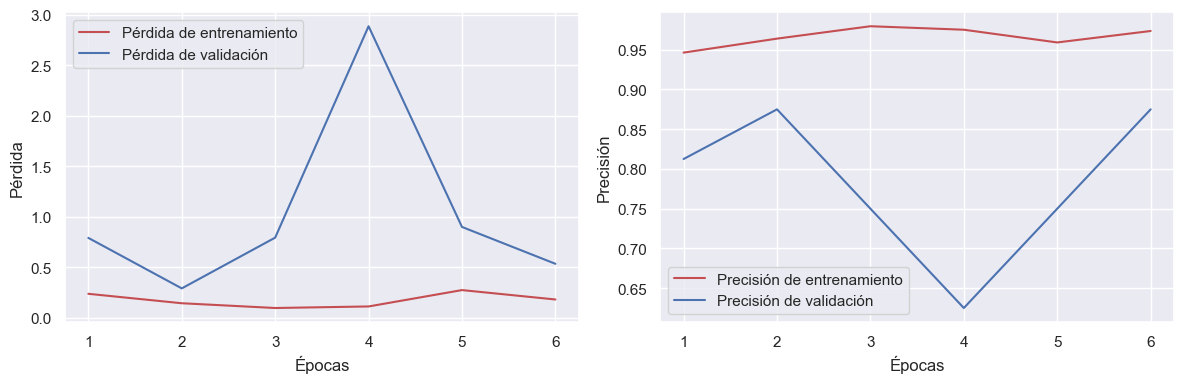

In [49]:
# Obtener datos del historial de entrenamiento
loss = hist.history['loss']
val_loss = hist.history['val_loss']
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']


#loss = history['loss']
#val_loss = history['val_loss']
#accuracy = history['accuracy']
#val_accuracy = history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Crear gráfica para la pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Crear gráfica para la precisión
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Precisión de entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Ajustar el diseño
plt.tight_layout()

# Mostrar las gráficas
plt.show()

In [50]:
#CONFUSION
y_pred = model.predict(x_test)




20/20 [==============================] - 188s 9s/step


In [51]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(y_pred_classes)
print(y_true_classes)

print(len(y_pred_classes))

[0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1
 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1
 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 0 0 1 1 1 1 1 1 1 1 

1/1 [==============================] - 0s 168ms/step


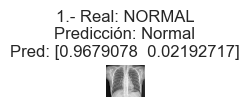

1/1 [==============================] - 0s 181ms/step


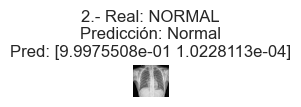

1/1 [==============================] - 0s 197ms/step


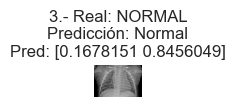

1/1 [==============================] - 0s 316ms/step


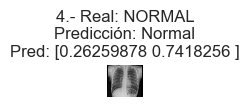

1/1 [==============================] - 0s 214ms/step


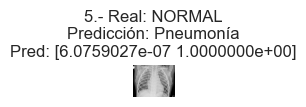

1/1 [==============================] - 0s 344ms/step


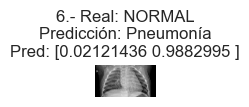

1/1 [==============================] - 0s 336ms/step


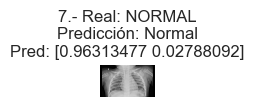

1/1 [==============================] - 0s 264ms/step


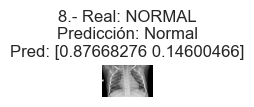

1/1 [==============================] - 0s 309ms/step


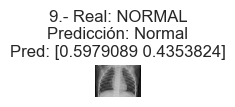

1/1 [==============================] - 0s 302ms/step


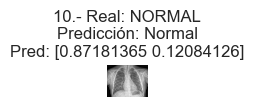

1/1 [==============================] - 0s 275ms/step


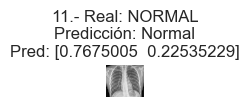

1/1 [==============================] - 0s 271ms/step


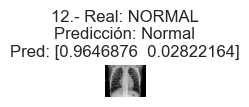

1/1 [==============================] - 0s 292ms/step


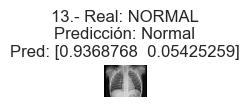

1/1 [==============================] - 0s 283ms/step


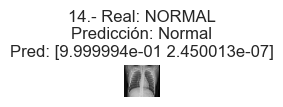

1/1 [==============================] - 0s 228ms/step


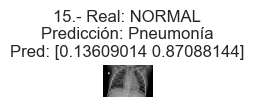

1/1 [==============================] - 0s 347ms/step


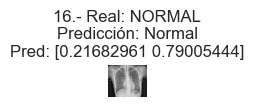

1/1 [==============================] - 0s 348ms/step


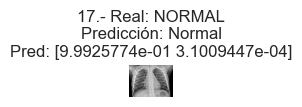

1/1 [==============================] - 0s 310ms/step


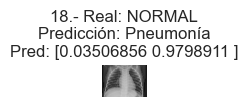

1/1 [==============================] - 0s 330ms/step


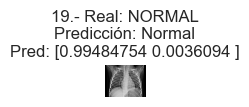

1/1 [==============================] - 0s 281ms/step


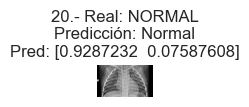

1/1 [==============================] - 0s 330ms/step


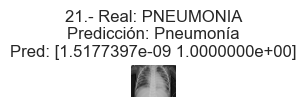

1/1 [==============================] - 0s 329ms/step


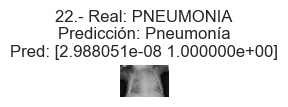

1/1 [==============================] - 0s 355ms/step


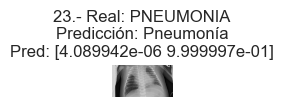

1/1 [==============================] - 0s 331ms/step


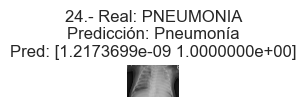

1/1 [==============================] - 0s 311ms/step


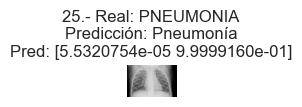

1/1 [==============================] - 0s 289ms/step


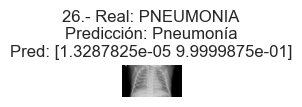

1/1 [==============================] - 0s 296ms/step


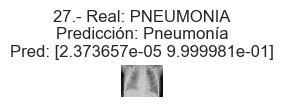

1/1 [==============================] - 0s 264ms/step


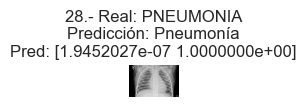

1/1 [==============================] - 0s 295ms/step


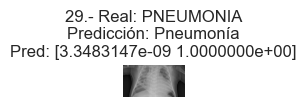

1/1 [==============================] - 0s 353ms/step


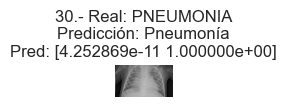

1/1 [==============================] - 0s 297ms/step


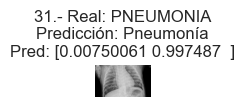

1/1 [==============================] - 0s 307ms/step


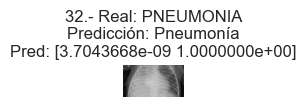

1/1 [==============================] - 0s 303ms/step


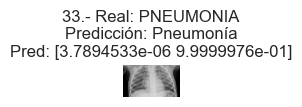

1/1 [==============================] - 0s 305ms/step


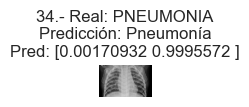

1/1 [==============================] - 0s 319ms/step


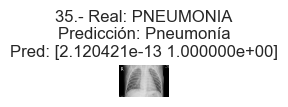

1/1 [==============================] - 0s 319ms/step


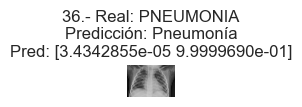

1/1 [==============================] - 0s 313ms/step


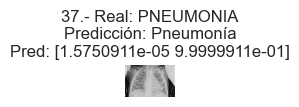

1/1 [==============================] - 0s 323ms/step


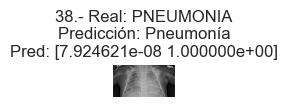

1/1 [==============================] - 0s 304ms/step


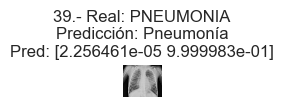

1/1 [==============================] - 0s 270ms/step


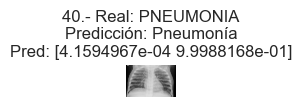

In [83]:
# Carpetas para probar
carpeta_madre = "/Users/Mariana_1/ORGANIZADOS/APRENDIENDO SISTEMAS/DATA SCIENCE/UCAMP DATA SCIENCE & AI/M7/Proyecto 7/chest_xray"
test_normal_dir = carpeta_madre + "/test/NORMAL"
test_pneumonia_dir = carpeta_madre + "/test/PNEUMONIA"
# Clases del modelo (normal y neumonía)
class_names = ['Normal', 'Pneumonía']

# Verificar algunas imágenes clasificadas por el modelo
sample_images = [os.path.join(test_normal_dir, img) for img in os.listdir(test_normal_dir)[:20]] + \
                [os.path.join(test_pneumonia_dir, img) for img in os.listdir(test_pneumonia_dir)[:20]]

for i, image_path in enumerate(sample_images, 1):
    image = cargar_procesar(image_path)
    prediction = model.predict(image)
    predicted_class = class_names[int(prediction[0][1] > 0.87)]  # Umbral de clasificación
    
    #print("imagen: " + image_path)
    #print("prediction: " + str(prediction[0]) )
    plt.figure(figsize=(10, 10))

    plt.subplot(20, 2, i)
    plt.imshow(load_img(image_path))
    plt.title(f"{i}.- Real: {os.path.basename(os.path.dirname(image_path))}\nPredicción: {predicted_class}\nPred: {str(prediction[0])}")
    plt.axis('off')
   
    #plt.tight_layout()
    plt.show()


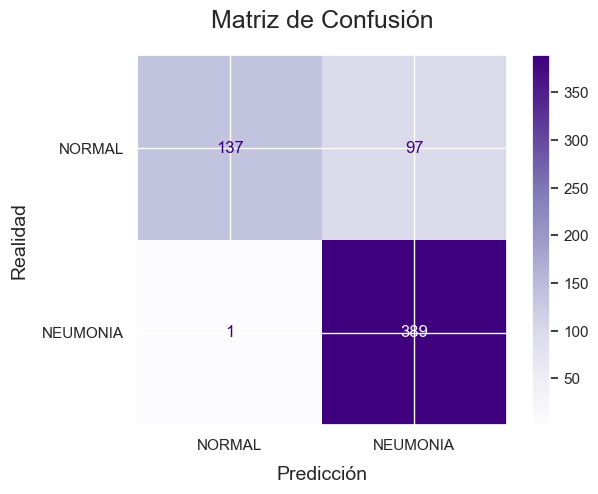

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)


disp = ConfusionMatrixDisplay(confusion_mtx, display_labels=['NORMAL', 'NEUMONIA'])
disp.plot(cmap='Purples', values_format='d')

plt.xlabel("Predicción", fontdict={'size': 14}, labelpad=10)
plt.ylabel("Realidad", fontdict={'size': 14}, labelpad=10)
plt.title("Matriz de Confusión", fontdict={'size': 18}, pad=20)
plt.show()


# Visualizar la matriz de confusión en un mapa de calor
#plt.figure(figsize=(8, 6))
#sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=categorias, yticklabels=categorias)
#plt.xlabel('Predicted')
#plt.ylabel('True')
#plt.title('Matriz de Confusión')
#plt.show()

### Pruebas del modelo con imágenes muestra 

In [47]:
#Probando con una imagen Normal

In [90]:
path = '/Users/Mariana_1/ORGANIZADOS/APRENDIENDO SISTEMAS/DATA SCIENCE/UCAMP DATA SCIENCE & AI/M7/Proyecto 7/chest_xray/test'
imagenesPrueba = []
imagenesPrueba.append(path + '/NORMAL/NORMAL2-IM-0381-0001.jpeg')
imagenesPrueba.append(path + '/NORMAL/NORMAL2-IM-0380-0001.jpeg')
imagenesPrueba.append(path + '/PNEUMONIA/person1685_virus_2903.jpeg')
imagenesPrueba.append(path + '/PNEUMONIA/person65_virus_123.jpeg')
#imagenesPrueba.append(path + '/PNEUMONIA/person99_bacteria_474.jpeg')
#imagenesPrueba.append(path + '/NORMAL/NORMAL2-IM-0332-0001.jpeg')


for imgPrueba in imagenesPrueba:
    print(imgPrueba)

/Users/Mariana_1/ORGANIZADOS/APRENDIENDO SISTEMAS/DATA SCIENCE/UCAMP DATA SCIENCE & AI/M7/Proyecto 7/chest_xray/test/NORMAL/NORMAL2-IM-0381-0001.jpeg
/Users/Mariana_1/ORGANIZADOS/APRENDIENDO SISTEMAS/DATA SCIENCE/UCAMP DATA SCIENCE & AI/M7/Proyecto 7/chest_xray/test/NORMAL/NORMAL2-IM-0380-0001.jpeg
/Users/Mariana_1/ORGANIZADOS/APRENDIENDO SISTEMAS/DATA SCIENCE/UCAMP DATA SCIENCE & AI/M7/Proyecto 7/chest_xray/test/PNEUMONIA/person1685_virus_2903.jpeg
/Users/Mariana_1/ORGANIZADOS/APRENDIENDO SISTEMAS/DATA SCIENCE/UCAMP DATA SCIENCE & AI/M7/Proyecto 7/chest_xray/test/PNEUMONIA/person65_virus_123.jpeg


1/1 [==============================] - 0s 164ms/step


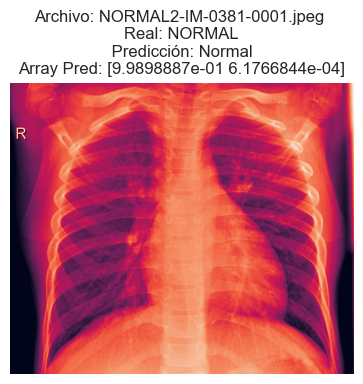

1/1 [==============================] - 0s 163ms/step


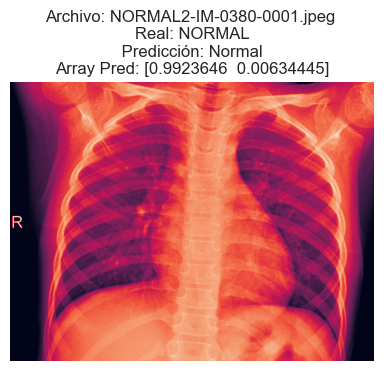

1/1 [==============================] - 0s 231ms/step


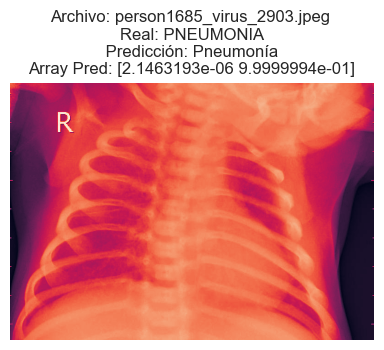

1/1 [==============================] - 0s 324ms/step


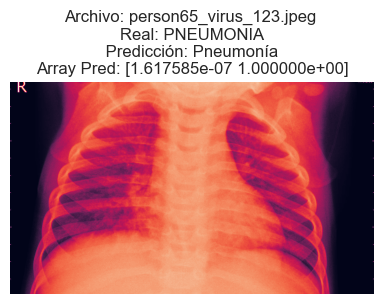

In [91]:
for imgPrueba in imagenesPrueba:
    with cbook.get_sample_data(imgPrueba) as image_file:
        image = plt.imread(image_file)
        
    imgPred = cargar_procesar(imgPrueba)
        
    prediction = model.predict(imgPred)
    predicted_class = class_names[int(prediction[0][1] > 0.87)]  # Umbral de clasificación
    plt.figure(figsize=(4, 4))
    plt.axis('off')
    plt.title(f"Archivo: {os.path.basename(imgPrueba)} \nReal: {os.path.basename(os.path.dirname(imgPrueba))}\n Predicción: {predicted_class} \nArray Pred: {str(prediction[0])}")
    plt.tight_layout()
    plt.imshow(image)
    
    #fig, ax = plt.subplots()
    #im = ax.imshow(image)

    #ax.axis('off')
    plt.show()